## 이미지

평균 밝기:  145.25
이미지가 너무 밝습니다.


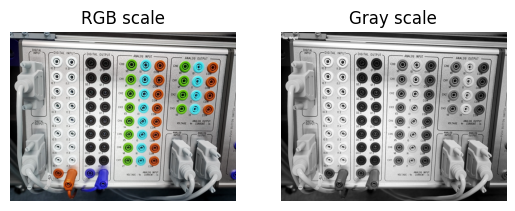

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # RGB -> BGR


# 1. numpy로 복사해서 즉석 이미지 생성
img = cv2.imread("c:\\Users\\user\\Pictures\\public\\sample2.jpg")

# 2. 그레이스케읿 변환 (색상 -> 밝기)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

# 3. 이미지의 평균 밝기를 계산
mean_brightness = np.mean(gray)
print(f"평균 밝기: {mean_brightness: .2f}")

if mean_brightness < 127.5:
    print("이미지가 너무 어둡습니다.")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)
elif mean_brightness >= 127.9:
    print("이미지가 너무 밝습니다.")
    gray = cv2.putText(gray.copy(), "Too Bright", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)
else:
    print("정상이미지 입니다.")


plt.subplot(1, 2, 1)
plt.title("RGB scale")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gray scale")
plt.imshow(gray, cmap = "gray")
plt.axis('off')
plt.show()

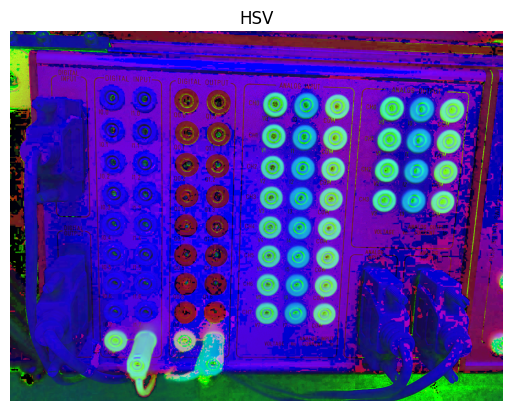

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpy로 복사해서 즉석 이미지 생성
#img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)
img = cv2.imread("c:\\Users\\user\\Pictures\\public\\sample2.jpg")

# 2. 그레이스케일 변환 (색상 -> 밝기)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. 이미지의 평균 밝기를 계산
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
out_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(hsv_img)
plt.title("HSV")
plt.axis('off')
plt.show()


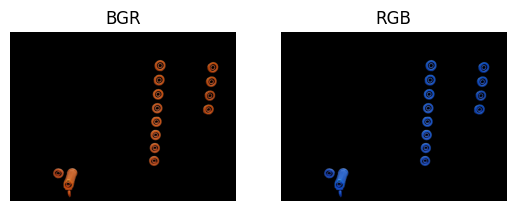

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpy로 복사해서 즉석 이미지 생성
#img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)

img = cv2.imread("c:\\Users\\user\\Pictures\\public\\sample2.jpg")
# 2. 그레이스케일 변환 (색상 -> 밝기)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. 이미지의 평균 밝기를 계산
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 파란색 범위를 정의
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# 마스크
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask=mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(blue_region)
plt.title("BGR")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blue_region_rgb)
plt.title("RGB")
plt.axis('off')
plt.show()


(1080, 1440, 3)


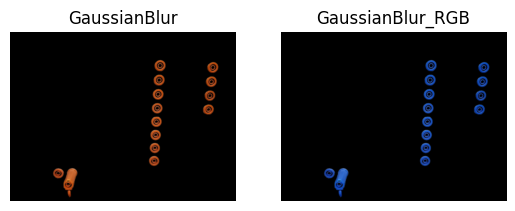

In [35]:
# 가우시안 블러 적용 (노이즈 제거)
blurred = cv2.GaussianBlur(blue_region, (7, 7), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)  

print(blurred_rgb.shape)

plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')



plt.show()



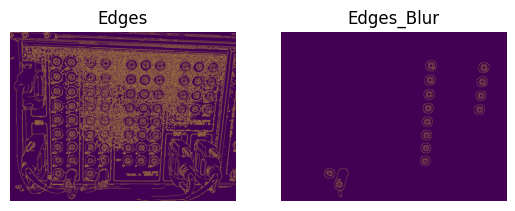

In [33]:
edges = cv2.Canny(img, 50, 150)
edges_blur = cv2.Canny(blurred_rgb, 50, 150)


plt.subplot(1,2,1)
plt.imshow(edges)
plt.title("Edges")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(edges_blur)
plt.title("Edges_Blur")
plt.axis('off')



plt.show()

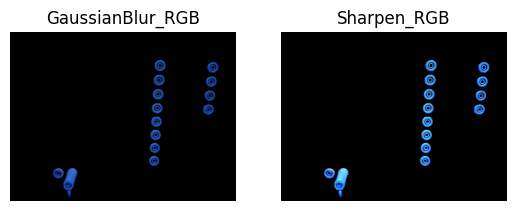

In [36]:
#blurred

# 3 x 3 선명화 커널
shape_kernel = np.array([[0, -2, 0],
                         [-2, 10, -2],   
                         [0, -2, 0]])

sharpen = cv2.filter2D(blurred, -1, shape_kernel)
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("Sharpen_RGB")
plt.axis('off')
plt.show()

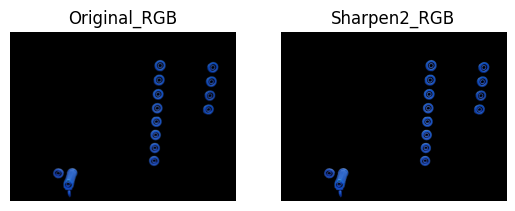

In [25]:
# 고급 선명화 기법

# blue_region
# blurred


sharpen2 = cv2.addWeighted(blue_region, 1.5, blurred, -0.5, 0)
sharpen2_rgb = cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB)    


plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("Original_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen2_rgb)
plt.title("Sharpen2_RGB")
plt.axis('off')
plt.show()